   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid  pubmed_id license  \
0  PMC35282   11472636   no-cc   
1  PMC59543   11667967   no-cc   
2  PMC59549   11667972   n

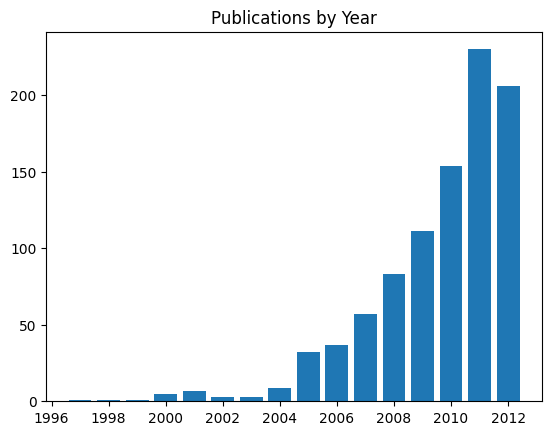

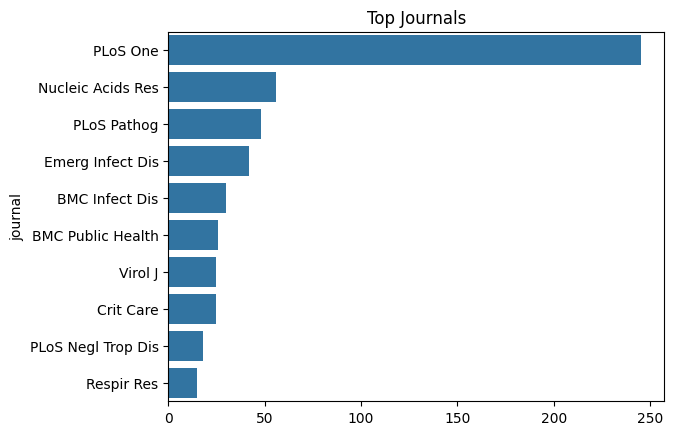

Top words: [('of', 713), ('and', 458), ('in', 431), ('the', 380), ('a', 360), ('for', 193), ('influenza', 169), ('virus', 147), ('to', 137), ('with', 113), ('human', 86), ('infection', 84), ('by', 77), ('h1n1', 70), ('from', 66), ('pandemic', 66), ('1', 64), ('on', 55), ('an', 54), ('cell', 54)]


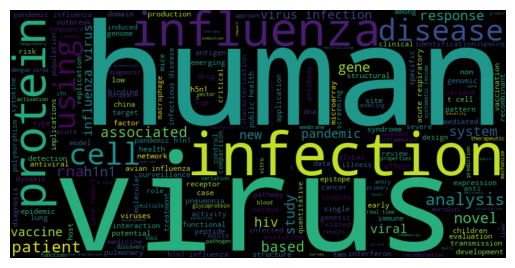

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud

%matplotlib inline

# Load dataset
df = pd.read_csv("metadata.csv")
print(df.head())

# Explore dataset
print(df.shape)
print(df.info())
print(df.isnull().sum().head(20))

# Clean
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['year'] = df['publish_time'].dt.year
df = df.dropna(subset=['title', 'abstract'])
df['abstract_word_count'] = df['abstract'].apply(lambda x: len(str(x).split()))

# Visualization 1 - Publications per year
year_counts = df['year'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.title("Publications by Year")
plt.show()

# Visualization 2 - Top Journals
top_journals = df['journal'].value_counts().head(10)
sns.barplot(x=top_journals.values, y=top_journals.index)
plt.title("Top Journals")
plt.show()

# Visualization 3 - Word frequency
words = " ".join(df['title'].dropna()).lower()
words = re.findall(r'\b\w+\b', words)
common_words = Counter(words).most_common(20)
print("Top words:", common_words)

# Visualization 4 - WordCloud
wordcloud = WordCloud(width=800, height=400).generate(" ".join(words))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
